In [11]:

import pylabnet.hardware.awg.zi_hdawg as zi_hdawg
from pylabnet.utils.logging.logger import LogClient


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import time

from IPython.display import clear_output, display

import pyvisa
from pylabnet.utils.logging.logger import LogClient
from pylabnet.network.client_server import agilent_e4405B
import pylabnet.hardware.spectrum_analyzer.agilent_e4405B as sa_hardware


import itertools as it
import pandas as pd
import seaborn as sns

from pylabnet.utils.logging.logger import LogService
from pylabnet.network.core.generic_server import GenericServer
import os
import sys
from pylabnet.utils.iq_upconversion.optimizer import IQOptimizer, IQOptimizer_GD
#from pylabnet.utils.iq_upconversion.optimizer_temp import IQOptimizer as IQ_w_ports
#from pylabnet.utils.iq_upconversion.optimizer_temp import IQOptimizer_GD
from pylabnet.network.client_server import HMC_T2220

from pylabnet.network.client_server.agilent_83732b import Client

# Instantiante HDAWG

In [2]:
'''dev_id = 'dev8354'

# Instantiate
logger = LogClient(
    host='140.247.189.50',
    port=12080,
    module_tag=f'ZI HDAWG {dev_id}'
)'''

"dev_id = 'dev8354'\n\n# Instantiate\nlogger = LogClient(\n    host='140.247.189.50',\n    port=12080,\n    module_tag=f'ZI HDAWG {dev_id}'\n)"

In [14]:
dev_id = 'dev8354'
# Instantiate Hardware class
hd = zi_hdawg.Driver(dev_id, None)

# Select channel grouping
#hd.set_channel_grouping(0)

#hd.enable_output(2)
#hd.enable_output(3)

# Connect to MW client

In [15]:
# Connect to MW source client
#mw_client = HMC_T2220.Client(
#    host='140.247.189.82',
#    port=2552
#)

# Connect to MW source client
mw = Client(
    host='140.247.189.50', 
    port=31864
)

In [17]:
# Check that MW source is set to correct power
# mw_client.output_on()
pow = 15  # -20 dBm
mw.set_power(pow)
mw.output_on()
#mw_client.get_power()

# Connect to Spectrum Analyzer

In [18]:
sa = agilent_e4405B.Client(
    host='140.247.189.24',
    port=41581
)

# Reset spectrum analzyer
sa.write('*RST')

(6, <StatusCode.success: 0>)

# Optimize

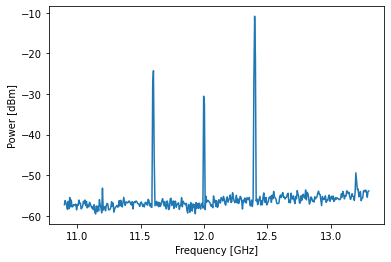

In [20]:
opt1 = IQOptimizer_GD(mw, hd, sa, 12e9, 400e6, param_guess = ([85, 1, 0.6, 0.01, 0.01]), awg_delay_time=0.01, averages=10, HDAWG_ports=[1,2], oscillator=1, min_power=-57, vi_step=0.005, vq_step=0.005)

41.38686966896057


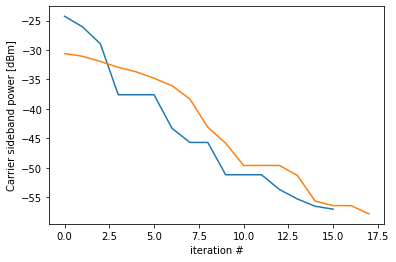

In [21]:
import time
start = time.time()
opt1.opt()
print(time.time()-start)

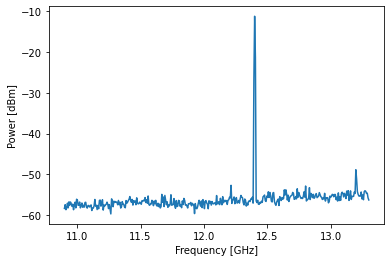

In [22]:
sa.plot_trace()